In [1]:
!pip install -e ..
import nextbike as nb
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Obtaining file:///C:/Users/meikh/Dropbox/Programming%20Data%20Science/PDS2020_Herber
  Attempting uninstall: PDS2020-Herber
    Found existing installation: PDS2020-Herber 0.0.1
    Uninstalling PDS2020-Herber-0.0.1:
      Successfully uninstalled PDS2020-Herber-0.0.1
  Running setup.py develop for PDS2020-Herber


Using TensorFlow backend.

Bad key "text.kerning_factor" on line 4 in
c:\users\meikh\miniconda3\envs\pds_herber\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## First look at the dataset

In [2]:
# Declare name of the csv-file
csv_name = "dortmund"
# Load dataset
path_a = Path(os.getcwd()).parent
path=os.path.join(path_a, f'data\input\{csv_name}.csv')
df = nb.input_output.read_file(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669652 entries, 0 to 669651
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   p_spot        669652 non-null  bool   
 1   p_place_type  669652 non-null  int64  
 2   datetime      669652 non-null  object 
 3   b_number      669652 non-null  int64  
 4   trip          669652 non-null  object 
 5   p_uid         669652 non-null  int64  
 6   p_bikes       669652 non-null  int64  
 7   p_lat         669652 non-null  float64
 8   b_bike_type   669652 non-null  int64  
 9   p_name        669652 non-null  object 
 10  p_number      669652 non-null  int64  
 11  p_lng         669652 non-null  float64
 12  p_bike        669652 non-null  bool   
dtypes: bool(2), float64(2), int64(6), object(3)
memory usage: 57.5+ MB


In [4]:
df.head()

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
0,True,0,2019-01-20 00:00:00,52073,first,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
1,True,0,2019-01-20 23:59:00,52073,last,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
2,True,0,2019-01-20 00:00:00,52331,first,113573,2,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
3,True,0,2019-01-20 23:59:00,52331,last,113573,4,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
4,True,0,2019-01-20 00:00:00,31346,first,113543,3,51.523351,4,Brackel Kirche,7337,7.546867,False


the b-variables stand for the bikes and the p-variables for the bike stations.

In [5]:
df[df.b_number == 50641].head(30)

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
6,True,0,2019-01-20 00:00:00,50641,first,113561,5,51.506312,4,Hainallee / Südbad,7351,7.470531,False
7,True,0,2019-01-20 16:22:00,50641,start,113561,5,51.506312,4,Hainallee / Südbad,7351,7.470531,False
8,True,0,2019-01-20 17:00:00,50641,end,6260019,1,51.493966,4,TU Dortmund Emil-Figge-Straße 50,7367,7.418008,False
9,True,0,2019-01-20 23:59:00,50641,last,6260019,1,51.493966,4,TU Dortmund Emil-Figge-Straße 50,7367,7.418008,False
851,True,0,2019-01-21 00:00:00,50641,first,6260019,1,51.493966,4,TU Dortmund Emil-Figge-Straße 50,7367,7.418008,False
852,True,0,2019-01-21 12:16:00,50641,last,6260019,5,51.493966,4,TU Dortmund Emil-Figge-Straße 50,7367,7.418008,False
1566,True,0,2019-01-22 07:59:00,50641,first,50375,2,51.514029,4,Schwanenwall,7311,7.472570,False
1567,True,0,2019-01-22 20:06:00,50641,start,50375,2,51.514029,4,Schwanenwall,7311,7.472570,False
1568,True,0,2019-01-22 20:22:00,50641,end,7314560,2,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
1569,True,0,2019-01-22 23:59:00,50641,last,7314560,2,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False


This is an inspection of a arbitrarily selected bike. If the trip is "start" and in the next observation "end", the location and the datetime changes from the first to the second observations. Observations with the trip values "first" and "last" always have the same time of the day and seem not to be associated with actual trips. As a consequence, start and end observations will be united into single observations and the first and last observations will be deleted.

In [6]:
# Delete all observations but start and end of trips
df = df[(df['trip'] == 'start') | (df['trip'] == 'end')]
df.reset_index(drop=True, inplace=True)

#### datetime conversion

In [7]:
# Convert datetime from string to datetime format
df['datetime'] = df['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

Using this apply function on the series works about 30 times quicker than iterating over its index! Unfortunately, I could not manage to do the same in the merging of observations in the next section, leading to a quite long processing time there. 

## Dataset transformation

In [8]:
# Create a missing value which does not exist in the dataset so far
-999.5 in df.values

False

In [9]:
# Create columns for the start and end of a trip
for i in df.columns:
    start_columns = i + "_start"
    df.rename(columns={i:start_columns}, inplace=True)
    end_columns = i + "_end"
    df[end_columns] = -999.5

In [10]:
# Every observation with start as the trip value that is followed by 
# an observation with an end trip value receives the data of the end
# observations in its end-columns
for i in df.index: 
    if(df['trip_start'][i] == 'start'):
        if(df['trip_start'][i+1] == 'end'):
            df['p_spot_end'][i] = df['p_spot_start'][i+1]
            df['p_place_type_end'][i] = df['p_place_type_start'][i+1]
            df['datetime_end'][i] = df['datetime_start'][i+1]
            df['b_number_end'][i] = df['b_number_start'][i+1]
            df['p_uid_end'][i] = df['p_uid_start'][i+1]
            df['p_bikes_end'][i] = df['p_bikes_start'][i+1]
            df['p_lat_end'][i] = df['p_lat_start'][i+1]
            df['b_bike_type_end'][i] = df['b_bike_type_start'][i+1]
            df['p_name_end'][i] = df['p_name_start'][i+1]
            df['p_number_end'][i] = df['p_number_start'][i+1]
            df['p_lng_end'][i] = df['p_lng_start'][i+1]
            df['p_bike_end'][i] = df['p_bike_start'][i+1]
            df['trip_start'][i] = 'united'

I could have also have used the shift function of Pandas Series in order to reduce processing time, but I do not have a guarantee that every start observation is followed by an end observation. 

In [11]:
# The edited observations received the trip value 'united' 
# Only they will remain in the dataset.
df = df[df['trip_start'] == 'united']
df.reset_index(drop=True, inplace=True)

In [12]:
# The trip variables can be dropped now
df.drop(['trip_start', 'trip_end'], axis = 1, inplace = True)

In [13]:
# If all new end variables have been filled with information, the next line should return False again
-999 in df.values

False

## Exploration and description of variables

#### p_spot

In [14]:
df['p_spot_start'].equals(df['p_spot_end'])

False

p_stot is not always the same for the start and the end of a trip.

In [15]:
# Transform Boolean to Integer
df['p_spot_start'] = df['p_spot_start'].astype(int)
df['p_spot_end'] = df['p_spot_end'].astype(int)

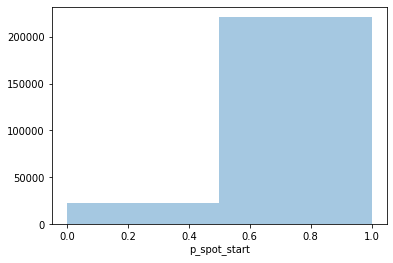

In [16]:
sns.distplot(df['p_spot_start'], kde=False, bins=2)

Most p-spot values are true, but a significant minority is not.

#### p_place_type

In [17]:
df['p_place_type_start'].unique()

array([ 0, 12], dtype=int64)

In [18]:
df['p_place_type_start'].equals(df['p_place_type_end'])

False

p_place_type is not always the same for the start and the end of a trip.

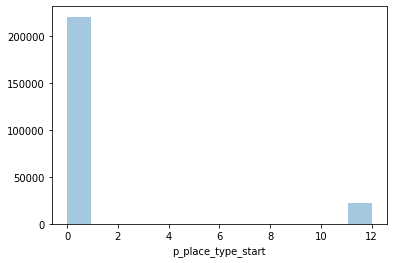

In [19]:
sns.distplot(df['p_place_type_start'], kde=False, bins=13)

It looks like p_place_type=12 could have something in common with p_spot=0

In [20]:
pd.crosstab(df['p_place_type_start'], df['p_spot_start'])

p_spot_start,0,1
p_place_type_start,,
0,10,220528
12,22340,0


Indeed, almost all false p_spot observations have 12 as p_place_type

In [21]:
df[(df['p_place_type_start'] == 0) & (df['p_spot_start'] == False)]

,p_spot_start,p_place_type_start,datetime_start,b_number_start,p_uid_start,p_bikes_start,p_lat_start,b_bike_type_start,p_name_start,p_number_start,...,datetime_end,b_number_end,p_uid_end,p_bikes_end,p_lat_end,b_bike_type_end,p_name_end,p_number_end,p_lng_end,p_bike_end
73502,0,0,2019-05-29 17:20:00,50356,16442929,1,51.504274,4,Eggensteinstr.,0,...,2019-05-29 17:27:00,50356.0,16442929.0,1.0,51.504274,4.0,Eggensteinstr.,0.0,7.567509,False
75850,0,0,2019-05-31 11:42:00,50356,16442929,1,51.504274,4,Eggensteinstr.,0,...,2019-05-31 11:49:00,50356.0,16442929.0,1.0,51.504274,4.0,Eggensteinstr.,0.0,7.567509,False
75851,0,0,2019-05-31 14:04:00,50356,16442929,1,51.504274,4,Eggensteinstr.,0,...,2019-05-31 14:06:00,50356.0,16442929.0,1.0,51.504274,4.0,Eggensteinstr.,0.0,7.567509,False
75852,0,0,2019-05-31 14:11:00,50356,16442929,1,51.504274,4,Eggensteinstr.,0,...,2019-05-31 14:14:00,50356.0,16442929.0,1.0,51.504274,4.0,Eggensteinstr.,0.0,7.567509,False
75853,0,0,2019-05-31 14:15:00,50356,16442929,1,51.504274,4,Eggensteinstr.,0,...,2019-05-31 14:17:00,50356.0,16442929.0,1.0,51.504274,4.0,Eggensteinstr.,0.0,7.567509,False
77494,0,0,2019-06-02 12:54:00,50356,16442929,1,51.504274,4,Eggensteinstr.,0,...,2019-06-02 13:01:00,50356.0,16442929.0,1.0,51.504274,4.0,Eggensteinstr.,0.0,7.567509,False
80049,0,0,2019-06-05 06:25:00,50356,16442929,1,51.504274,4,Eggensteinstr.,0,...,2019-06-05 09:43:00,50356.0,50386.0,3.0,51.508994,4.0,Städtische Kliniken,7322.0,7.457513,False
95509,0,0,2019-06-24 09:19:00,51119,17271353,2,51.488401,14,DEKT -Warsteiner Music Hall,7723,...,2019-06-24 11:53:00,51119.0,50394.0,5.0,51.496109,14.0,Westfalenpark,7330.0,7.470120,False
95825,0,0,2019-06-24 09:21:00,50746,17271353,2,51.488401,4,DEKT -Warsteiner Music Hall,7723,...,2019-06-24 11:39:00,50746.0,126107.0,4.0,51.500702,4.0,Märkische Str. / B1,7366.0,7.483363,False
96171,0,0,2019-06-24 05:22:00,50841,17271705,1,51.512030,14,DEKT - St. Franziskus,7727,...,2019-06-24 05:31:00,50841.0,113561.0,1.0,51.506312,14.0,Hainallee / Südbad,7351.0,7.470531,False


There is nothing obviously common in the cases where p_spot and p_place_type are differing.

#### p_bike

In [22]:
df['p_bike_start'].equals(df['p_bike_end'])

False

In [23]:
# Transform Boolean to Integer
df['p_bike_start'] = df['p_bike_start'].astype(int)
df['p_bike_end'] = df['p_bike_end'].astype(int)

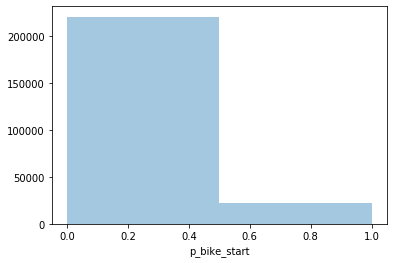

In [24]:
sns.distplot(df['p_bike_start'], kde=False, bins=2)

Looks like p_spot and p_place_type.

In [25]:
pd.crosstab(df['p_bike_start'], df['p_place_type_start'])

p_place_type_start,0,12
p_bike_start,,
0,220538,0
1,0,22340


In [26]:
pd.crosstab(df['p_bike_end'], df['p_place_type_end'])

p_place_type_end,0.0,12.0
p_bike_end,,
0,216404,0
1,0,26474


p_bike and p_place_type contain exactly the same information. Therefore, p_place_type can be dropped.

In [27]:
df.drop(['p_place_type_start', 'p_place_type_end'], axis = 1, inplace = True)

Further explorations did not answer the question, for what p_place_type, p_bike and p_spot stand, but they contain almost the same information, so that it is likely that only one of them will be included in the prediction.

#### p_bikes

In [28]:
df['p_bikes_start'].equals(df['p_bikes_end'])

False

In [29]:
df['p_bikes_start'].unique()

array([ 5,  2,  1,  3,  4,  0,  7,  6,  8,  9, 10, 11, 12, 14, 13, 15, 16,
       17, 18, 24, 25, 23, 20, 26, 19, 22, 21, 30, 28, 29, 27, 35, 33, 34,
       31, 39, 37, 32, 36, 51, 41, 49, 46, 47, 42, 45, 43, 53, 40, 44, 48,
       38, 50, 56, 55, 52, 60, 54, 58, 59, 57, 63, 62, 65, 64, 66, 61, 67,
       72, 68, 69, 73, 71, 70], dtype=int64)

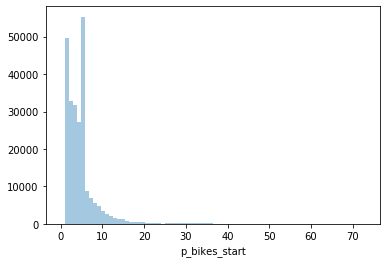

In [30]:
sns.distplot(df['p_bikes_start'], kde=False, bins=76)

p_bikes looks like a count variable and seems to be a metric variable of how many bycicles are currently located at a station. 

#### b_number

In [31]:
df['b_number_start'].equals(df['b_number_end'])

False

b_number is the same at the start and end of a trip.

In [32]:
df.drop(['b_number_end'], axis = 1, inplace = True)
df.rename(columns={'b_number_start':'b_number'}, inplace=True)

In [33]:
df['b_number'].nunique()

1253

In [34]:
b_number_values = df['b_number'].unique()
b_number_values.sort()
b_number_values

array([   843,   4422,   4628, ..., 500863, 500864, 500987], dtype=int64)

b_number seems to be the ID of the bikes and should not contain important information for the travel duration, which is why it can be dropped before the prediction tasks. However, this variable is kept for the visualizations.

#### p_uid 

In [35]:
df['p_uid_start'].equals(df['p_uid_end'])

False

In [36]:
pd.crosstab(df['p_uid_start'], df['p_uid_end'])

p_uid_end,50366.0,50367.0,50368.0,50370.0,50371.0,50372.0,50373.0,50375.0,50376.0,50377.0,...,26515144.0,26516464.0,26516693.0,26516704.0,26518154.0,26518369.0,26518656.0,26519327.0,26519457.0,26520121.0
p_uid_start,,,,,,,,,,,,,,,,,,,,,
50366,1454,4,3,33,4,9,10,10,7,6,...,0,0,0,0,0,0,0,0,0,0
50367,3,1026,79,31,8,22,6,7,0,2,...,0,0,0,0,0,0,0,0,0,0
50368,1,58,1065,29,7,16,9,11,7,0,...,0,0,0,0,0,0,0,0,0,0
50370,55,64,46,4877,57,616,42,712,41,242,...,0,0,0,0,0,0,1,0,0,0
50371,5,7,13,23,967,64,19,48,11,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26511757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26512272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26512451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df['p_uid_start'].nunique()

18572

In [38]:
p_uid_values = df['p_uid_start'].unique()
p_uid_values.sort()
print(p_uid_values)

[   50366    50367    50368 ... 26512451 26515001 26518370]


p_uid could be a more precise nominal place variable than p_number. This could provide useful information for prediction, but almost 18000+ categorical values are too many for including them as dummies in a model. One way of dealing with this could be to reduce their number by clustering them. Another problem could be that p_uid values that occur in the test but not the training set could be misspecified in the prediction.

#### p_number

In [39]:
df['p_number_start'].equals(df['p_number_end'])

False

In [40]:
df['p_number_start'].nunique()

97

In [41]:
pd.crosstab(df['p_number_start'], df['p_number_end'])

p_number_end,0.0,7300.0,7302.0,7303.0,7304.0,7306.0,7307.0,7308.0,7309.0,7310.0,...,7388.0,7720.0,7721.0,7722.0,7723.0,7724.0,7725.0,7726.0,7727.0,7729.0
p_number_start,,,,,,,,,,,,,,,,,,,,,
0,13425,15,98,259,147,915,74,156,90,64,...,27,0,0,0,41,0,0,0,0,0
7300,9,612,5,1,1,52,1,4,3,1,...,0,0,0,0,0,0,0,0,0,0
7302,122,29,1454,4,3,33,4,9,10,1,...,0,0,0,2,0,0,1,0,0,0
7303,288,0,3,1026,79,31,8,22,6,96,...,0,0,0,0,1,0,0,1,0,2
7304,201,6,1,58,1065,29,7,16,9,37,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,33,0,0,0,0
7725,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
7726,0,0,0,0,0,2,0,1,0,0,...,0,0,1,0,0,0,0,15,0,1


In [42]:
p_number_values = df['p_number_start'].unique()
p_number_values.sort()
p_number_values

array([   0, 7300, 7302, 7303, 7304, 7306, 7307, 7308, 7309, 7310, 7311,
       7312, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322,
       7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333,
       7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 7343, 7344,
       7345, 7346, 7347, 7348, 7349, 7350, 7351, 7352, 7353, 7354, 7355,
       7356, 7357, 7358, 7359, 7360, 7361, 7362, 7363, 7364, 7365, 7366,
       7367, 7368, 7369, 7370, 7371, 7372, 7373, 7374, 7375, 7376, 7377,
       7378, 7379, 7380, 7381, 7382, 7383, 7384, 7385, 7386, 7387, 7388,
       7720, 7721, 7722, 7723, 7724, 7725, 7726, 7727, 7729], dtype=int64)

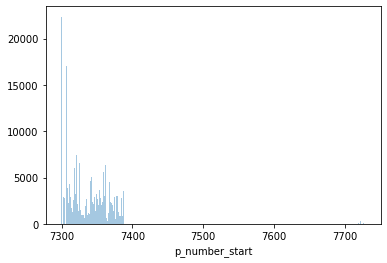

In [43]:
df['p_number_start'].replace({0: 7299}, inplace=True)
sns.distplot(df['p_number_start'], kde=False, bins=431)
df['p_number_start'].replace({7299: 0}, inplace=True)

p_number does not follow a certain distribution but is a nominal measurement. It may represent the 96 boroughs of Dortmund.

In [44]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
pd.crosstab(df['p_number_start'], df['p_uid_start'])

p_uid_start,50366,50367,50368,50370,50371,50372,50373,50375,50376,50377,...,26508508,26509471,26509784,26510766,26511063,26511757,26512272,26512451,26515001,26518370
p_number_start,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
7300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7302,2888,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7303,0,3159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7304,0,0,2756,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


p_number seems to be an aggregate of p_uid. Because of this, p_uid could be dropped before prediction in order to reduce the number of dimensions.

In [45]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.crosstab(df['p_number_start'], df['p_name_start'])
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

p_number really seems to stand for the boroughs of Dortmund. The bike stations seem to lie only within one p_number or to have the p_number value 0, which could stand for missing or other values. As with p_uid, p_number could be preffered over p_name in order to reduce complexity in the prediction.

#### b_bike_type

In [46]:
df['b_bike_type_start'].equals(df['b_bike_type_end'])

False

In [47]:
df.drop(['b_bike_type_end'], axis = 1, inplace = True)
df.rename(columns={'b_bike_type_start':'b_bike_type'}, inplace=True)

In [48]:
df['b_bike_type'].unique()

array([ 4,  5, 14,  0, 15, 71], dtype=int64)

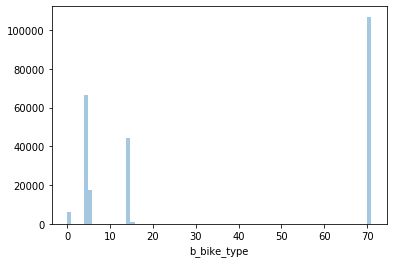

In [49]:
sns.distplot(df['b_bike_type'], kde=False, bins=72)

b_bike_type is a nominal variable of seemingly different bike types.

#### p_name

In [50]:
df['p_name_start'].nunique()

828

In [51]:
p_name_values = df['p_name_start'].unique()
p_name_values.sort()
p_name_values

array(['( inoff.) Märkische Straße 84a', '(inoff.) Emil-Figge-Straße 61',
       '7344', 'Adlerstraße 38', 'Alleestraße 27', 'Alter Mühlenweg',
       'Am Beilstück', 'Am Beilstück 13', 'Am Beilstück 38',
       'Am Bentenskamp 26', 'Am Gardenkamp', 'Am Gardenkamp 51',
       'Am Gardenkamp 51, Dortmund', 'Am Kai 22', 'Am Kai 35',
       'Am Kaiserbrunnen', 'Am Stift',
       'Am Zehnthof 119 (Wohn- und Begegnungszetrum Zehnthof)',
       'Amalienstraße 26', 'Amalienstraße 38', 'An den Emscherauen 43',
       'An den Lothen 27', 'An der Palmweide', 'Arndtstraße 77',
       'Arneckestraße 40', 'Auf dem Berge 8', 'BIKE 10351', 'BIKE 10856',
       'BIKE 31284', 'BIKE 50000', 'BIKE 500000', 'BIKE 500001',
       'BIKE 500002', 'BIKE 500003', 'BIKE 500004', 'BIKE 500005',
       'BIKE 500006', 'BIKE 500007', 'BIKE 500008', 'BIKE 500009',
       'BIKE 500010', 'BIKE 500011', 'BIKE 500012', 'BIKE 500013',
       'BIKE 500014', 'BIKE 500015', 'BIKE 500016', 'BIKE 500017',
       'BIKE 500018'

These are places which also include missing and stolen bikes. There are many values with "Bike" and a number, but the numbers are not the same as for the values of b_number. In a multilevel model they could be used as makro level variable. For other predictive models, it might be better to use the districts or boroughs in order to reduce the number of dummies. 

#### p_lng and p_lat

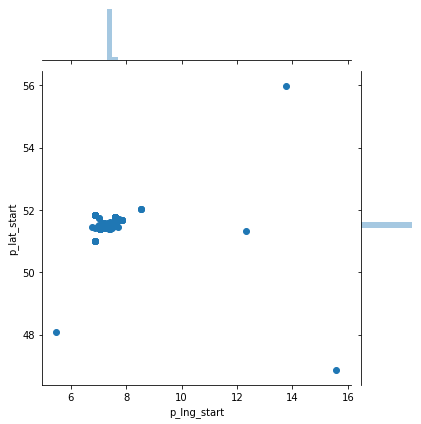

In [52]:
sns.jointplot(x='p_lng_start', y='p_lat_start', data=df)

Looks like some trips in the dataset start far away from Dortmund. They will be excluded with help of the geodata later.

## Adding variables for descriptive and predictive tasks

#### Trip Duration

In [53]:
# Convert datetime_end to datetime format
df['datetime_end'] = df['datetime_end'].apply(lambda x: str(x))
df['datetime_end'] = df['datetime_end'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [54]:
# Create duration in minutes
df['duration'] = (df['datetime_end'] - df['datetime_start']).apply(lambda x: int((x.seconds)/60))

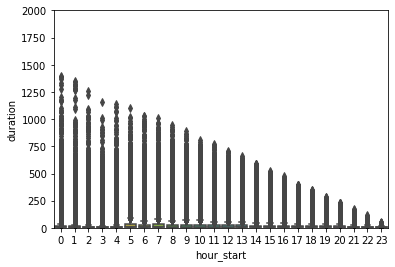

In [55]:
## Description of trip duration per hour
# Create hour of day at start
df['hour_start'] = df['datetime_start'].apply(lambda x: x.hour)
# Show special boxplot from the descriptive analysis
reduced_df = df[['duration', 'hour_start']]
ax = sns.boxplot(x='hour_start', y='duration', data=reduced_df)
ax.set(ylim=(0, 2000))
plt.show(ax)

This analysis from the next notebook shows that the duration of a trip is only so long that the trip ends at the same day it started.

In [56]:
# Check if day of start and end of any trip is not the same
df[df['datetime_start'].apply(lambda x: x.weekday()) != df['datetime_end'].apply(lambda x: x.weekday())]

,p_spot_start,datetime_start,b_number,p_uid_start,p_bikes_start,p_lat_start,b_bike_type,p_name_start,p_number_start,p_lng_start,...,datetime_end,p_uid_end,p_bikes_end,p_lat_end,p_name_end,p_number_end,p_lng_end,p_bike_end,duration,hour_start


Indeed, this is not due to a coding error, but the dataset does only contain trips which end at the same day they started.

In [57]:
df[['duration', 'datetime_start', 'datetime_end']][(df['datetime_start'].apply(lambda x: x.hour) == 23)].head(20)

,duration,datetime_start,datetime_end
5,9,2019-01-20 23:30:00,2019-01-20 23:39:00
65,12,2019-01-20 23:35:00,2019-01-20 23:47:00
101,13,2019-01-20 23:21:00,2019-01-20 23:34:00
140,4,2019-01-21 23:18:00,2019-01-21 23:22:00
363,15,2019-01-22 23:21:00,2019-01-22 23:36:00
587,3,2019-01-23 23:30:00,2019-01-23 23:33:00
588,2,2019-01-23 23:54:00,2019-01-23 23:56:00
692,9,2019-01-24 23:27:00,2019-01-24 23:36:00
835,9,2019-01-24 23:23:00,2019-01-24 23:32:00
1155,14,2019-01-25 23:38:00,2019-01-25 23:52:00


This is also exemplified in this example. The dataset seems to be reduced to observations which end their trips at the same they started it. Predictions based on this reduced dataset will be biased if applied to a full dataset with trips which pass days. 

#### Daytime at start

In [58]:
# Create daytime in minutes at start
df['daytime_in_min_start'] = df['datetime_start'].apply(lambda x: (x.hour)*60 + x.minute)

#### Hour at start

In [59]:
# Create hour of day at start (although already done above)
df['hour_start'] = df['datetime_start'].apply(lambda x: x.hour)

#### Weekday

In [60]:
# Create weekday at start
df['day_of_week_start'] = df['datetime_start'].apply(lambda x: x.weekday())
df['day_of_week_start'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

#### Weekend or working day

In [61]:
# Create a dummy for weekend
df['weekend_start'] = df['day_of_week_start'].apply(lambda x: 1 if x >= 5 else 0)

#### Month

In [62]:
# Create month at start
df['month_start'] = df['datetime_start'].apply(lambda x: x.month)
df['month_start'].unique()

array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [63]:
# Save the preprocessed dataset
path=os.path.join(path_a, f'data\input\{csv_name}_preprocessed.csv')
df.to_csv(path)